* 데이터셋 소개
    * 해당 Kaggle 데이터셋( https://www.kaggle.com/blastchar/telco-customer-churn )은 통신사 고객 이탈(Churn)에 대한 정보를 담고 있습니다. IBM에서 제공한 이 데이터셋은 고객 유지에 필요한 행동을 예측하는 데 사용될 수 있으며, 고객 데이터를 분석하여 고객 유지 프로그램을 개발하는 데 도움이 됩니다.
* 해당 데이터셋은 다음의 정보로 구성되어 있습니다.
    * 고객 인구 통계 정보(Demographic info): 고객의 성별, 연령대, 배우자 및 부양 가족의 유무(Gender, SeniorCitizen, Partner, Dependents) 등에 관한 정보가 포함되어 있습니다.
    * 고객 이탈(Churn) 정보: 서비스를 중단 여부에 대한 정보가 포함되어 있습니다.
    * 서비스 가입 정보(Services subscribed): 고객들이 가입한 서비스들, 예를 들어 전화, 다중 라인, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, 스트리밍 TV 및 영화( honeService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) 등에 대한 정보가 있습니다.
    * 고객 계정 정보(Customer account info): 고객이 얼마나 오래 서비스를 이용했는지, 계약 유형, 결제 방법, 무페이퍼 청구 여부, 월별 요금, 총 요금 (CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure)등의 정보가 담겨 있습니다.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# 데이터 로드
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

(7043, 20)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# info 결측치 확인, 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [ ]:
df.index.nunique() # 변수의 고윳값 개수를 나태내줌

7043

In [ ]:
# # 숫자형태로 된 문자열을 숫자형으로 바꿔줍니다.
# df["TotalCharges"].replace(" ", np.nan).astype(float)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

df["TotalCharges"].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

<Axes: ylabel='Frequency'>

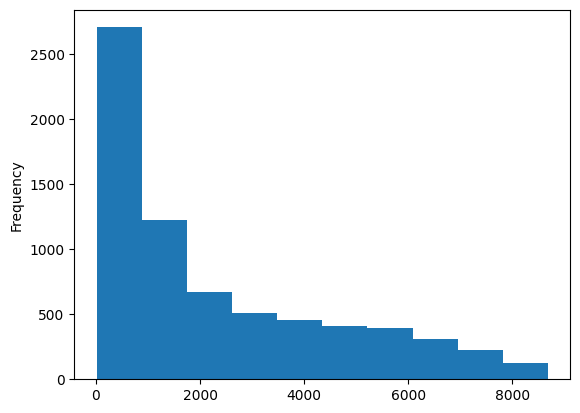

In [ ]:
df["TotalCharges"].plot(kind="hist")

<Axes: xlabel='TotalCharges'>

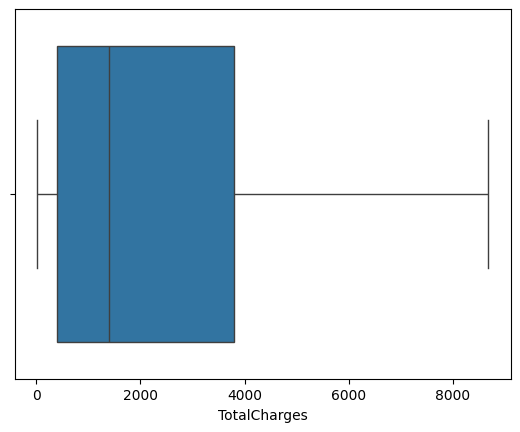

In [ ]:
sns.boxplot(data = df, x = "TotalCharges")

## 기술 통계


- **평균 (Mean)**: $\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i$
  - 모든 데이터 포인트의 합을 데이터의 개수로 나눈 값
- **표본 분산 (Sample Variance)**: $s^2 = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2$
  - 각 데이터 포인트와 평균의 차이의 제곱의 합을 자유도(n-1)로 나눈 값
- **표준편차 (Standard Deviation)**: $s = \sqrt{s^2}$
  - 분산의 제곱근
- **Z-점수 (Z-Score)**: $z = \frac{x - \mu}{\sigma}$
  - 개별 데이터 포인트가 평균으로부터 표준편차의 몇 배 떨어져 있는지 나타내는 값
- **t-통계량 (t-Statistic)**: $t = \frac{\bar{x} - \mu}{s/\sqrt{n}}$
  - 표본 평균이 모집단 평균으로부터 얼마나 떨어져 있는지 나타내는 값


In [ ]:
# describe
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


* 모집단과 표본
    - 모집단과 표본
    - 모수와 통계량
* 무선 표집
    - 표집 방법(층화표집)
    - 표집 분포

## 표집
* 표집 후 시각화 비교

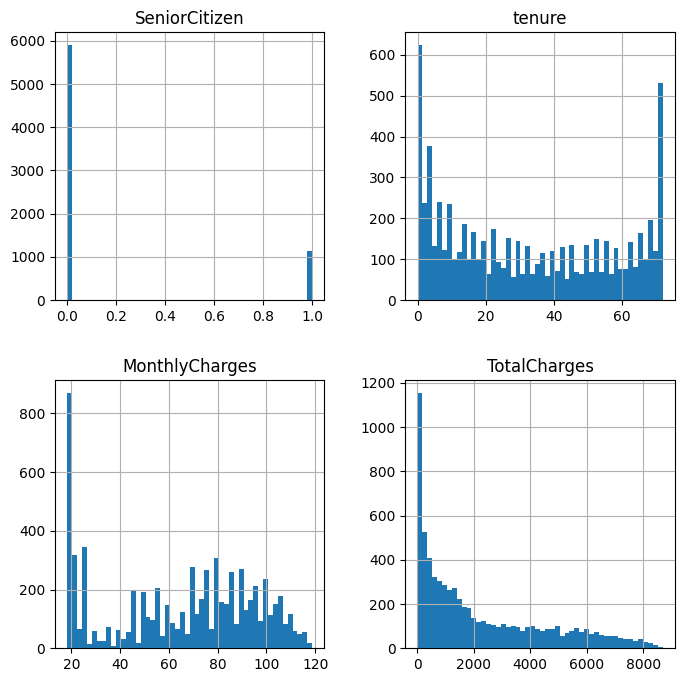

In [ ]:
df.hist(bins=50, figsize=(8, 8));

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

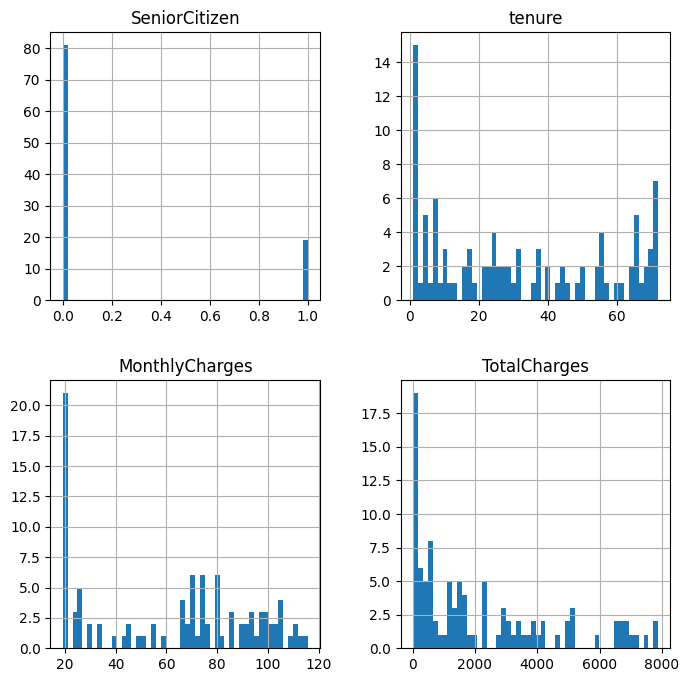

In [ ]:
# df.sample(n).hist();
df.sample(100).hist(bins=50, figsize=(8, 8))

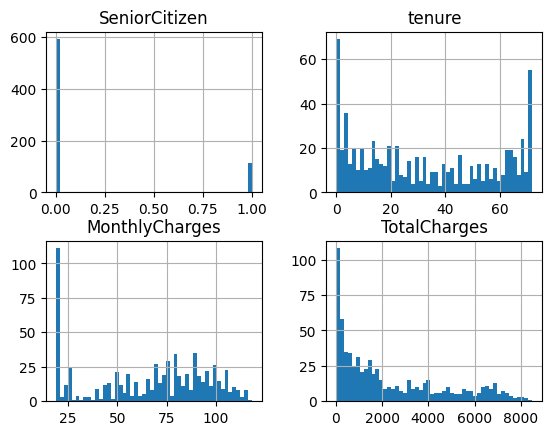

In [ ]:
df.sample(frac=0.1).hist(bins = 50);

### 무선 표집으로 중심극한정리 실습

부트스트래핑

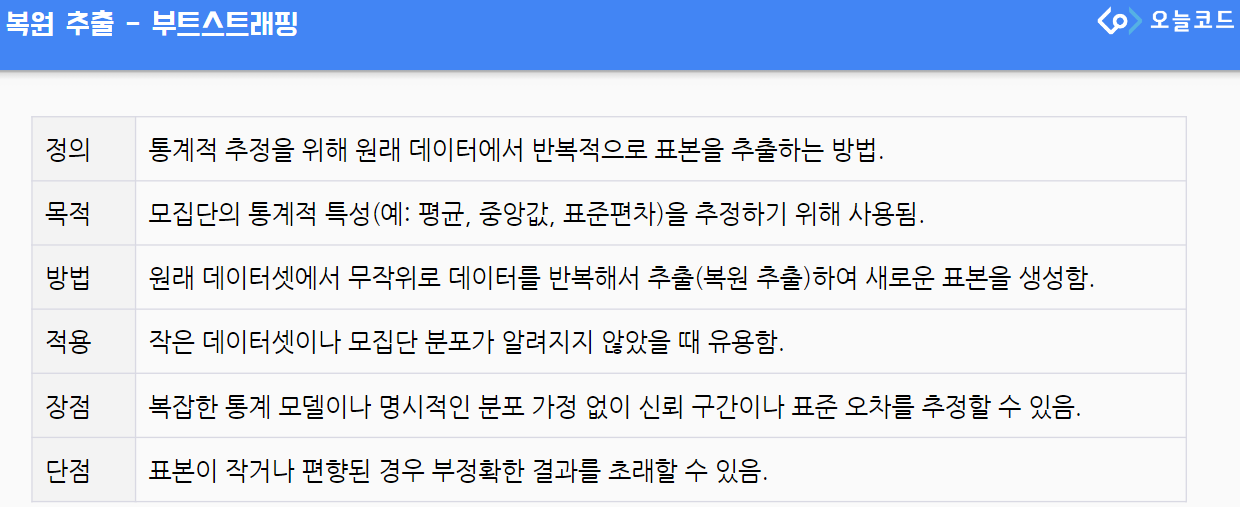

In [ ]:
# 중심극한정리를 시연하기 위해, 여러 번에 걸쳐서 표본 평균을 계산합니다.
sample_means = []
n_samples = 1000  # 표본 추출 횟수
sample_size = 50   # 각 표본의 크기

for _ in range(n_samples):
  tmp_mean = df["MonthlyCharges"].sample(sample_size, replace=True).mean(numeric_only=True)
  sample_means.append(tmp_mean)

In [ ]:
sample_means

[63.722,
 72.129,
 69.48500000000001,
 71.60300000000001,
 61.442,
 69.43700000000001,
 70.78300000000002,
 62.32,
 68.51100000000001,
 68.079,
 63.542,
 64.044,
 62.31100000000001,
 65.009,
 69.683,
 63.51300000000001,
 65.31599999999999,
 62.015,
 61.32200000000001,
 61.68800000000001,
 67.26599999999999,
 60.174,
 67.343,
 66.731,
 60.656000000000006,
 55.77000000000001,
 69.89,
 74.214,
 67.613,
 67.32700000000001,
 63.62299999999999,
 69.22399999999999,
 67.151,
 61.834999999999994,
 69.193,
 65.863,
 57.398,
 60.368999999999986,
 73.161,
 62.707,
 55.104000000000006,
 64.65,
 66.768,
 65.12500000000001,
 64.817,
 62.15800000000001,
 67.979,
 64.352,
 62.283,
 61.751999999999995,
 54.788999999999994,
 69.909,
 64.267,
 58.04099999999998,
 64.366,
 70.45800000000001,
 65.96300000000001,
 68.616,
 58.48500000000001,
 64.277,
 68.879,
 63.617999999999995,
 65.292,
 63.05,
 69.92399999999999,
 66.71900000000001,
 59.279,
 64.98899999999999,
 65.447,
 61.02400000000001,
 68.539,
 59.97

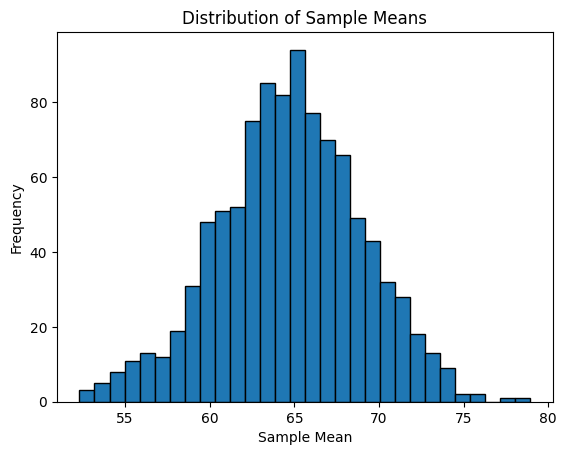

In [ ]:
# 표본 평균들의 분포를 시각화합니다.
plt.hist(sample_means, bins=30, edgecolor='black')
plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

## 층화 표집
* 통계학에서, 층화표집(層化標集, Stratified sampling)은 모집단을 먼저 중복되지 않도록 층으로 나눈 다음 각 층에서 표본을 추출하는 방법이다. 층을 나눌 때 층내는 동질적(homogeneous), 층간은 이질적(heterogeneous) 특성을 가지도록 하면 적은 비용으로 더 정확한 추정을 할 수 있으며, 전체 모집단뿐만 아니라 각 층의 특성에 대한 추정도 할 수 있다는 장점이 있다. 각 층으로부터 표본을 추출할 때 단순임의 추출방법을 쓸 수도 있고 계통표집(systematic sampling) 등 다른 추출방법을 쓸 수도 있다. 또 필요에 따라 각 층을 다시 하위층으로 나누어 추출하는 다단계 층화 추출을 하기도 한다.
* https://ko.wikipedia.org/wiki/층화표집
* [sklearn.model\_selection.train\_test\_split — scikit-learn 1.4.0 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)

In [ ]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [ ]:
df["Churn"].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [ ]:
df["Churn"].value_counts(1)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [ ]:
# 층화표집 수행
# stratified_sample

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, df["Churn"], test_size = 0.2, random_state=42, stratify = df["Churn"])

In [ ]:
# 전체 샘플 빈도
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
# 전체 샘플 빈도 비율
df["Churn"].value_counts(1)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [ ]:
# 층화 표집 빈도 비율
X_train["Churn"].value_counts(1)

No     0.734647
Yes    0.265353
Name: Churn, dtype: float64

In [ ]:
X_test["Churn"].value_counts(1)

No     0.734564
Yes    0.265436
Name: Churn, dtype: float64

### 무선 표집을 통한 표본 분산으로 자유도 실습

- **표본 분산 (Sample Variance)**: $s^2 = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2$
  - 각 데이터 포인트와 평균의 차이의 제곱의 합을 자유도(n-1)로 나눈 값
- [자유도 (통계학) - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%9E%90%EC%9C%A0%EB%8F%84_(%ED%86%B5%EA%B3%84%ED%95%99))

#### 전체 표본

In [ ]:
# var(ddof=0)
df["TotalCharges"].var(ddof=0)

5137521.711318777

In [ ]:
# var(ddof=1)
df["TotalCharges"].var(ddof=1)

5138252.407053568

#### 무선 표집 표본

In [ ]:
# var(ddof=0)
df["TotalCharges"].sample(100).var(ddof=0)

4943911.63755

In [ ]:
# var(ddof=1)
df["TotalCharges"].sample(100).var(ddof=1)

4531933.947619562

## 점추정과 구간추정
* 점추정
    * 점추정은 모집단 매개변수(예: 평균, 비율)에 대한 단일 수치 추정치를 제공합니다.
    * 월별 지출 데이터의 평균을 계산하여 점추정을 수행합니다.
* 구간 추정
    * 구간 추정은 모집단 매개변수가 포함될 것으로 예상되는 값의 범위를 제공합니다. 일반적으로 신뢰구간을 사용하여 표현합니다.
    * 월별 지출 데이터에 대한 95% 신뢰구간을 계산합니다. 이를 위해 t-분포를 사용하며, 신뢰구간의 너비는 표본 크기, 표본 평균, 표본 표준편차에 따라 결정됩니다.
## 신뢰 구간과 신뢰 수준

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

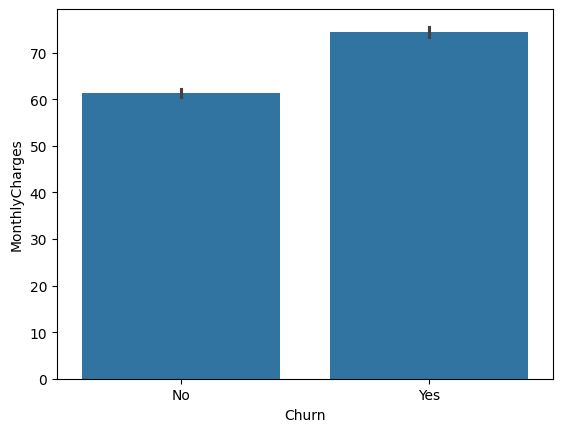

In [ ]:
# 막대그래프를 통한 신뢰 구간 확인, 이탈률에 따른 월별 요금
sns.barplot(data=df, x="Churn", y="MonthlyCharges", errorbar="ci")

In [ ]:
# sns.barplot?

In [ ]:
# 월별 지출(MonthlyCharges) 데이터 추출
monthly_charges = df['MonthlyCharges']

# 점추정: 월별 지출의 표본 평균 계산
point_estimate = monthly_charges.mean()
print(point_estimate)

# 구간 추정: 95% 신뢰구간 계산
# 표본 크기, 표본 평균, 표본 표준편차 계산
sample_size  = len(monthly_charges)
sample_mean = monthly_charges.mean()
# 표본 표준편차 (자유도 n-1 사용)
sample_std = np.std(monthly_charges, ddof=1)
sample_std

64.76169246059918


30.090047097678493

In [ ]:
# 분산 직접 계산
variance = ((monthly_charges - monthly_charges.mean()) ** 2).sum()/len(monthly_charges)
variance_dof = ((monthly_charges - monthly_charges.mean()) ** 2).sum()/(len(monthly_charges)-1)
standard_deviation = variance**0.5

print("분산: ", variance)
print("분산(dof사용):", variance_dof)
print("표준편차: ", standard_deviation)

분산:  905.2823796146344
분산(dof사용): 905.4109343405098
표준편차:  30.087910854936975


### 신뢰 구간 계산    
* 신뢰수준 설정(confidence_level)
    * confidence_level = 0.95: 이는 신뢰구간이 모집단 매개변수를 포함할 확률을 95%로 설정한다는 것을 의미합니다. 즉, 신뢰구간 계산의 정확성을 95%로 가정합니다.

* 알파 값 계산(alpha)
    * alpha = 1 - confidence_level: 신뢰수준의 여완값으로, 1에서 신뢰수준을 뺀 값입니다. α는 1종 오류(귀무가설이 참인데 기각하는 오류)를 범할 확률을 나타냅니다. 여기서는 0.05(5%)입니다.
    * 여완 값(Complement Value)은 통계학에서 특정 확률 값의 보완적인 부분을 나타내는 용어입니다. 특히, 가설 검정에서 중요한 개념인 유의수준(α)과 관련하여 자주 언급됩니다.
    * 유의수준(α)은 귀무가설이 사실일 때 잘못해서 귀무가설을 기각할 확률입니다. 예를 들어, α가 0.05(5%)라면, 귀무가설이 참인 경우에도 5%의 확률로 귀무가설을 기각하는 실수를 할 수 있음을 의미합니다. 이때, 여완 값은 1에서 α 값을 뺀 것으로, α의 보완적인 부분을 나타냅니다. α가 0.05일 때, 여완 값은 1 - 0.05 = 0.95(95%)가 됩니다.
    * 여완 값은 유의수준과 대비하여 어떤 사건이 발생하지 않을 확률을 나타내며, 통계적 검정에서 귀무가설을 기각하지 않을 확률을 의미합니다. 이를 통해 가설 검정에서 결과의 신뢰성이나 타당성을 평가하는 데 도움을 줍니다.

* 임계값(t_critical) 계산
    * t_critical = stats.t.ppf(1 - alpha/2, df=sample_size-1): t 분포의 임계값을 계산합니다. 이 값은 신뢰구간의 양 끝단을 결정하는 데 사용됩니다. α/2는 양측 검정에서 오류를 고려하는 것이며, df=sample_size-1는 자유도를 의미합니다(여기서 자유도는 표본 크기에서 1을 뺀 값).
    * stats.t.ppf() 함수는 SciPy 라이브러리의 stats 모듈에 있는 함수로, t-분포의 퍼센트 포인트 함수(Percent Point Function, PPF)입니다. 이 함수는 주어진 확률에 대응하는 t-분포의 값(임계값)을 반환합니다.
        * q: 확률입니다. 이는 t-분포의 누적 분포 함수(CDF)에서의 확률과 대응합니다.
        * df: 자유도(degree of freedom)입니다. t-분포의 모양을 결정합니다.

* 오차 한계(margin_of_error) 계산
    * margin_of_error = t_critical * (sample_std / np.sqrt(sample_size)): 신뢰구간의 너비를 계산합니다. 이는 표본 평균 주위에서 얼마나 범위를 설정할 것인지를 결정합니다. 표본 표준편차와 표본 크기의 제곱근을 이용해 계산합니다.

* 신뢰구간(confidence_interval) 계산
    * confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error): 계산된 오차 한계를 표본 평균의 양쪽에 더하고 빼서 신뢰구간을 구합니다.

* 점추정과 신뢰구간 반환
    * point_estimate, confidence_interval: 점추정(표본 평균)과 계산된 신뢰구간을 반환합니다.

In [ ]:
# 신뢰구간 계산 (t-분포 사용)
# stats.t.ppf 로 t_critical 구하기
confidence_level = 0.95
alpha = 1 - confidence_level

t_critical = stats.t.ppf(1 - alpha/2, df=sample_size-1)  # t-분포의 임계값
margin_of_error = t_critical * (sample_std / np.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

point_estimate, confidence_interval

(64.76169246059918, (64.05883579770197, 65.46454912349638))

* 임계값 해석
    * 위 예시에서 반환된 t_critical 값은 해당 자유도에서 t-분포의 상위 2.5% 지점에 해당하는 값을 의미합니다. 즉, t-분포 상에서 가장 극단적인 2.5% 값 중 하나입니다.
    * 이 값은 t-검정과 같은 통계적 검정에서 귀무가설의 기각 여부를 결정하는 데 사용됩니다. 예를 들어, t-검정 통계량이 이 임계값을 초과하면 귀무가설을 기각합니다.
* 비즈니스 및 연구에서의 응용
    * stats.t.ppf() 함수는 연구나 비즈니스 의사결정에서 데이터의 유의성을 평가하는 데 사용됩니다.
    * 예를 들어, 제품의 효과, 캠페인의 효율성, 시장 변화 등을 평가할 때 이 함수를 사용하여 유의한 결과를 얻을 수 있는 임계값을 설정할 수 있습니다

<Axes: xlabel='MonthlyCharges'>

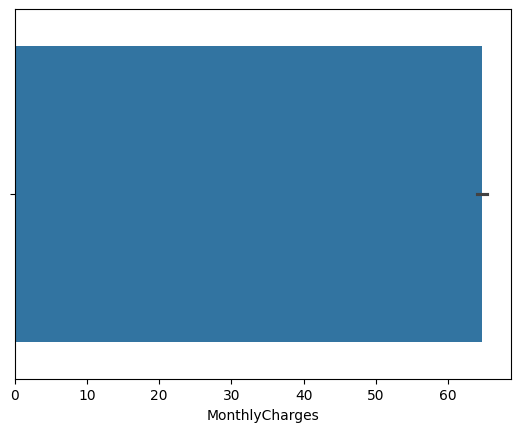

In [ ]:
# sns.barplot 으로 MonthlyCharges 신뢰 구간 확인하기
sns.barplot(data=df, x="MonthlyCharges")

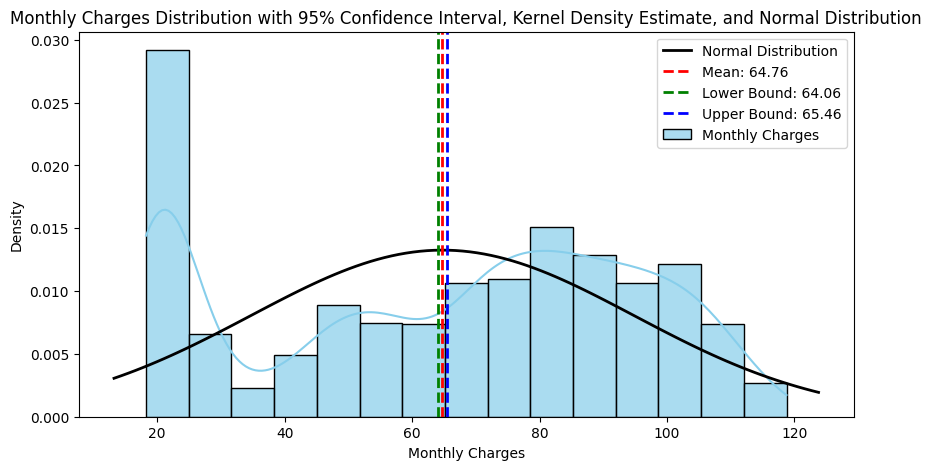

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

plt.figure(figsize=(10, 5))
sns.histplot(monthly_charges, bins=15, kde=True, color='skyblue', label='Monthly Charges', alpha=0.7, stat='density')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, sample_mean, sample_std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {sample_mean:.2f}')
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=2, label=f'Lower Bound: {confidence_interval[0]:.2f}')
plt.axvline(confidence_interval[1], color='blue', linestyle='dashed', linewidth=2, label=f'Upper Bound: {confidence_interval[1]:.2f}')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.title('Monthly Charges Distribution with 95% Confidence Interval, Kernel Density Estimate, and Normal Distribution')
plt.legend()
plt.show()

## z-score가 높은 상위 10% 고객의 이탈률 확인
* 가설: 월별 요금(MonthlyCharges)이 높은 고객일수록 이탈(Churn) 확률이 높다.
* 이 가설은 월별 요금이 고객의 이탈 결정에 영향을 미칠 수 있다는 것을 가정합니다.

* z-score 계산: 월별 요금에 대해 평균(mean)과 표준편차(standard deviation)를 계산한 후, 각 데이터 포인트에 대해 z-score를 계산합니다.
* z-score 공식:
* z = (X−μ)/ σ

* X는 개별 데이터 포인트, μ는 평균, σ는 표준편차입니다.
* z-score는 데이터 포인트가 평균으로부터 표준편차의 몇 배만큼 떨어져 있는지를 나타냅니다.

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
monthly_charges_ss = ss.fit_transform(df[["MonthlyCharges"]])
pd.DataFrame(monthly_charges_ss).describe()

,0
count,7.043000e+03
mean,-6.406285e-17
std,1.000071e+00
min,-1.545860e+00
25%,-9.725399e-01
50%,1.857327e-01
75%,8.338335e-01
max,1.794352e+00


평균:  -6.406284782161914e-17
표준편차:  0.9999999999999999


customerID
7590-VHVEG     No
5575-GNVDE     No
3668-QPYBK    Yes
7795-CFOCW     No
9237-HQITU    Yes
             ... 
6840-RESVB     No
2234-XADUH     No
4801-JZAZL     No
8361-LTMKD    Yes
3186-AJIEK     No
Name: Churn, Length: 7043, dtype: object

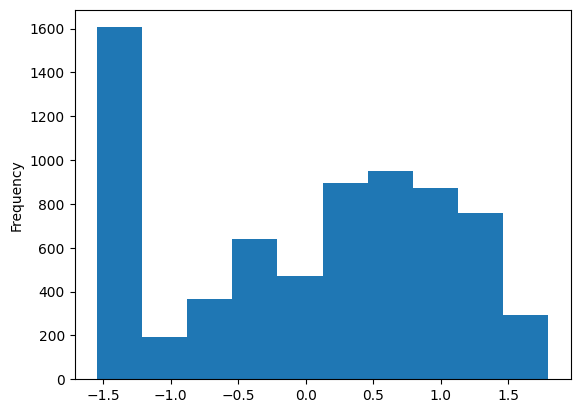

In [ ]:
# 비즈니스 가설 설정
# 가설: "월별 요금(MonthlyCharges)이 높은 고객일수록 이탈(Churn) 확률이 높다."

# z-score 계산
# 월별 요금(MonthlyCharges)에 대한 평균과 표준편차

# 월별 요금에 대한 z-score 계산
# z = (X−μ)/ σ (X는 개별 데이터 포인트, μ는 평균, σ는 표준편차)
target = df["MonthlyCharges"]
df['MonthlyCharges_z'] = (target - target.mean())/target.std()

print("평균: ", df["MonthlyCharges_z"].mean())
print("표준편차: ", df["MonthlyCharges_z"].std())
df["MonthlyCharges_z"].plot(kind="hist")

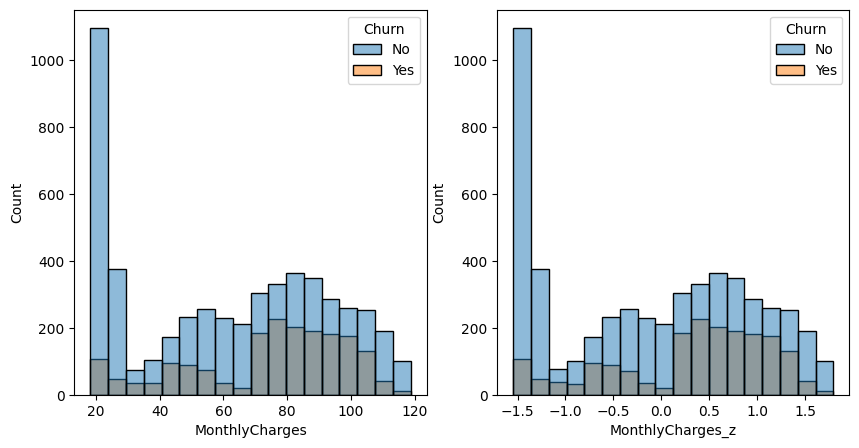

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(x="MonthlyCharges", hue="Churn", data=df, kde=False, ax=ax[0])
sns.histplot(x="MonthlyCharges_z", hue="Churn", data=df, kde=False, ax=ax[1])

plt.show()

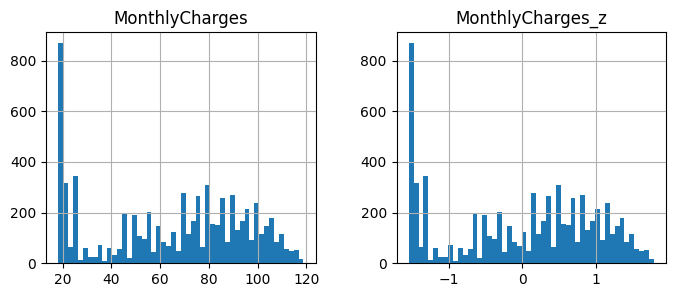

In [ ]:
# hist
df[["MonthlyCharges", "MonthlyCharges_z"]].hist(figsize=(8, 3), bins=50);

In [ ]:
# describe
df[["MonthlyCharges", "MonthlyCharges_z"]].describe()

,MonthlyCharges,MonthlyCharges_z
count,7043.000000,7.043000e+03
mean,64.761692,-6.406285e-17
std,30.090047,1.000000e+00
min,18.250000,-1.545750e+00
25%,35.500000,-9.724708e-01
50%,70.350000,1.857195e-01
75%,89.850000,8.337743e-01
max,118.750000,1.794225e+00


### 이탈률 분석
* 분석 결과에 따라 통신사는 고가 요금제 고객의 이탈을 방지하기 위한 전략을 수립할 수 있습니다.
예를 들어, 이탈률이 높게 나타난다면 요금제 구조 재검토, 충성 고객에 대한 인센티브 제공 등의 조치를 고려할 수 있습니다.

In [ ]:
# quantile 을 통해 0.9 구간을 구함
df['MonthlyCharges_z'].quantile(0.9)

1.2575024364890448

In [ ]:
high_customers = df[df["MonthlyCharges"] > df["MonthlyCharges"].quantile(0.9)]
high_customers.shape

(704, 21)

In [ ]:
# z-score를 활용하여 이탈률 분석
# z-score가 높은 상위 10% 고객의 이탈률 확인
high_z_customers = df[df["MonthlyCharges_z"] > df['MonthlyCharges_z'].quantile(0.9)]
high_z_customers.shape

(704, 21)

In [ ]:
# 전체 고객 이탈률
df["Churn"].value_counts(1)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [ ]:
# 상위 10% 고객 이탈률
high_z_customers["Churn"].value_counts(1)

No     0.752841
Yes    0.247159
Name: Churn, dtype: float64

In [ ]:
high_customers["Churn"].value_counts(1)

No     0.752841
Yes    0.247159
Name: Churn, dtype: float64

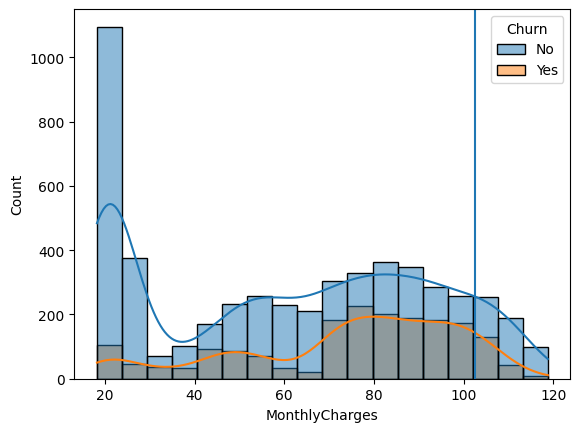

In [ ]:
sns.histplot(data=df, x="MonthlyCharges", kde=True, hue="Churn")
plt.axvline(df["MonthlyCharges"].quantile(0.9))

### t-test

- **t-통계량 (t-Statistic)**: $t = \frac{\bar{x} - \mu}{s/\sqrt{n}}$
  - 표본 평균이 모집단 평균으로부터 얼마나 떨어져 있는지 나타내는 값
  
- [scipy.stats.ttest\_ind — SciPy Manual](https://scipy.github.io/devdocs/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind)
- [t-검정 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/T-%EA%B2%80%EC%A0%95)

## 평균에 대한 가설 검정
* 평균에 대한 가설 검정은 표본 데이터를 사용하여 모집단의 평균에 대한 가설을 검정하는 것입니다. 예를 들어, 어떤 치료법이 효과가 있는지를 평균 회복 시간을 비교하여 검정할 수 있습니다.

* 가설 검정 과정
1) 귀무가설과 대립가설을 설정합니다.
2) 적절한 검정 통계량을 선택하고 계산합니다 (예: t-검정).
3) P-값을 계산하여 α와 비교합니다.
4) P-값이 α보다 작으면 귀무가설을 기각하고, 그렇지 않으면 귀무가설을 채택합니다.

## t-검정
### 새로운 지불방식이(B)가 기존 지불방식(A)보다 고객 이탈률을 감소시킨다.

#### t-test

- **t-통계량 (t-Statistic)**: $t = \frac{\bar{x} - \mu}{s/\sqrt{n}}$
  - 표본 평균이 모집단 평균으로부터 얼마나 떨어져 있는지 나타내는 값
  
- [scipy.stats.ttest\_ind — SciPy Manual](https://scipy.github.io/devdocs/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind)
- [t-검정 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/T-%EA%B2%80%EC%A0%95)

이탈한 고객(Churn == 'Yes')과 이탈하지 않은 고객(Churn == 'No')의 통신사 이용 기간(tenure) 데이터를 분리하여 추출합니다. 이 데이터를 사용하여 두 그룹 간의 평균 이용 기간에 차이가 있는지 t-검정을 수행합니다.

* t-통계량: 두 그룹 간의 평균 이용 기간에 매우 큰 차이가 있음을 나타냅니다. t-통계량이 음수이므로 이탈한 고객 그룹의 평균 이용 기간이 더 짧습니다.
* p-값: 매우 낮은 p-값은 귀무가설(통신사 이용 기간이 고객 이탈 여부에 영향을 미치지 않는다)을 기각하는 데 충분합니다. 즉, 통신사 이용 기간과 고객의 이탈 여부는 통계적으로 유의미한 관련이 있음을 의미합니다.
* 자유도: 자유도는 두 표본의 분산이 다르다고 가정했을 때 계산됩니다. 이 경우 높은 자유도는 t-분포가 정규분포에 가깝다는 것을 나타냅니다.

In [ ]:
# 이탈률을 나타내는 'Churn' 열의 데이터를 숫자 형태로 변환
# 이탈 여부를 숫자로 변환 (Yes: 1, No: 0)
df['Churn_bi']

KeyError: 'Churn_bi'

In [ ]:
# from scipy.stats import ttest_ind

# 비즈니스 가설 설정
# 가설: 새로운 지불방식이(B)가 기존 지불방식(A)보다 고객 이탈률을 감소시킨다.

# A/B 테스트를 위한 데이터 준비
# 예를 들어, 'PaymentMethod'가 'Electronic check'인 고객을 그룹 A로,
# 'Bank transfer (automatic)'인 고객을 그룹 B로 설정
group_A = df[df['PaymentMethod'] == 'Electronic check']['Churn_bi']
group_B = df[df['PaymentMethod'] == 'Bank transfer (automatic)']['Churn_bi']

# t-검정 수행
# t_statistic, p_value



### 이탈 고객과 잔류 고객의 이용 기간에 유의미한 차이가 있는지 분석

* 귀무가설 (Null Hypothesis, H₀): 이탈한 고객과 이탈하지 않은 고객의 이용 기간에는 통계적으로 유의미한 차이가 없다.
* 대립가설 (Alternative Hypothesis, H₁): 이탈한 고객과 이탈하지 않은 고객의 이용 기간에는 통계적으로 유의미한 차이가 있다.

* 고객 유지 전략 개발: 잔존 기간이 짧은 고객군에서 이탈률이 높다면, 회사는 이러한 고객을 대상으로 하는 특별한 유지 전략이나 프로그램을 개발할 수 있습니다.
* 고객 세분화: 잔존 기간에 따라 다른 고객 세그먼트를 식별하고, 각 세그먼트에 맞는 맞춤형 서비스를 제공할 수 있습니다.

In [ ]:
# sns.histplot 으로 tenure 에 대한 이탈 여부 시각화


In [ ]:
# 이탈여부에 대한 표본 분산 구하기(자유도=1)


In [ ]:
# 이탈 여부에 따른 이용 기간 분석을 위한 데이터 추출
churn_yes = df[df['Churn'] == 'Yes']['tenure']
churn_no = df[df['Churn'] == 'No']['tenure']

# t-검정 수행
# stats.ttest_ind 함수는 두 독립 표본 그룹 간의 평균 차이를 검정하는 데 사용됩니다. .
# equal_var=False는 두 그룹의 분산이 동일하지 않다는 가정 하에 검정을 수행하라는 의미입니다.
# 이는 보통 두 표본 크기가 다르거나 데이터의 분포가 서로 다를 때 사용됩니다.
# t_statistic은 t-검정 통계량으로, 두 그룹 간 평균 차이의 크기와 방향을 나타냅니다.
# p_value는 귀무가설이 참일 때 관측된 결과가 발생할 확률입니다.
# 이 값이 매우 작으면(보통 0.05 이하), 두 그룹 간 평균 차이가 통계적으로 유의미하다고 해석할 수 있습니다.
# t_statistic, p_value



* t_statistic은 t-검정 통계량으로, 두 그룹 간의 평균 차이의 크기와 방향을 나타냅니다.
    * 이 값이 음수라는 것은 첫 번째 그룹의 평균이 두 번째 그룹의 평균보다 작다는 것을 의미합니다.
    * 값의 절대값이 크면 클수록 두 그룹 간의 평균 차이가 더 크다는 것을 나타냅니다.
* p_value는 귀무가설 하에서 현재 관측된 결과(또는 더 극단적인 결과)가 나타날 확률입니다.
    * 이 값이 매우 작다는 것은 두 그룹 간의 평균 차이가 통계적으로 매우 유의미하다는 것을 나타냅니다.
    * 일반적으로 p-value가 0.05(5%) 이하일 경우, 귀무가설을 기각하고 대립가설을 채택합니다.
    
* 1종 오류 (Type I Error): 귀무가설이 참일 때, 잘못해서 귀무가설을 기각하는 오류입니다.
    * 매우 낮은 p_value 는 귀무가설(이탈한 고객과 이탈하지 않은 고객의 이용 기간에 차이가 없다)을 기각할 강력한 근거를 제공합니다. 그러나, 이것이 반드시 귀무가설이 거짓이라는 것을 의미하지는 않습니다. 즉, 이 결과로 인해 귀무가설을 잘못 기각할 확률(1종 오류를 범할 확률)은 매우 낮지만, 여전히 존재합니다.
* 2종 오류 (Type II Error): 대립가설이 참일 때, 귀무가설을 잘못 채택하는 오류입니다.
    * 매우 낮은 p_value와 높은 t_statistic의 절대값은 귀무가설을 기각하고 대립가설(이탈한 고객과 이탈하지 않은 고객의 이용 기간에 차이가 있다)을 채택하는 데 충분합니다. 따라서, 이 경우 2종 오류(귀무가설이 거짓임에도 불구하고 채택하는 경우)를 범할 가능성은 매우 낮습니다.

### 서비스 유형에 따른 이탈률 비교

* 귀무가설: "PhoneService를 이용하는 고객과 그렇지 않은 고객 간의 이탈률에 차이가 없다."
* 대립가설: "PhoneService를 이용하는 고객과 그렇지 않은 고객 간의 이탈률에 차이가 있다."

#### 등분산성 검정 (Levene's Test)
* [등분산성 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%93%B1%EB%B6%84%EC%82%B0%EC%84%B1)
* 두 그룹의 분산이 동일한지를 검사합니다. 이것은 t-검정을 수행하기 전에 중요한 단계입니다.
* Levene's test를 사용하여 등분산성을 검정하고, 그 결과에 따라 t-검정의 equal_var 매개변수를 결정합니다.

* 독립 표본 t-검정: 두 그룹의 이탈률 평균에 통계적으로 유의미한 차이가 있는지를 평가합니다.
* 등분산성 검정 결과에 따라 equal_var 매개변수를 True(등분산 가정) 또는 False(등분산 가정하지 않음)로 설정합니다.

#### 1종 오류와 2종 오류의 개념
* 1종 오류 (Type I Error): 귀무가설이 참일 때 잘못하여 귀무가설을 기각하는 오류입니다. 이는 잘못된 양성 결과를 의미합니다.
* 2종 오류 (Type II Error): 대립가설이 참일 때 잘못하여 귀무가설을 채택하는 오류입니다. 이는 잘못된 음성 결과를 의미합니다.

* 1종 오류의 사례
    * 코드에서 계산된 p-value가 매우 낮아 귀무가설을 기각한다고 가정합니다.
    * 실제로는 PhoneService 이용 여부가 이탈률에 영향을 미치지 않지만, 분석 결과에 따라 그렇다고 잘못 결론 내릴 수 있습니다.
    * 이 오류로 인해 통신사는 불필요한 서비스 조정이나 마케팅 전략을 채택할 수 있습니다.
* 2종 오류의 사례
    * 코드에서 계산된 p-value가 높아 귀무가설을 채택한다고 가정합니다.
    * 실제로는 PhoneService 이용 여부가 이탈률에 유의미한 영향을 미치지만, 분석 결과에 따라 그렇지 않다고 잘못 결론 내릴 수 있습니다.
    * 이 오류로 인해 통신사는 중요한 서비스 개선 기회를 놓칠 수 있습니다.
    

In [ ]:
# PhoneService를 이용하는 고객과 그렇지 않은 고객의 이탈률 데이터 추출
phone_service_yes = df[df['PhoneService'] == 'Yes']['Churn_bi']
phone_service_no = df[df['PhoneService'] == 'No']['Churn_bi']

# 등분산성 검정
_, p_value_homogeneity = stats.levene(phone_service_yes, phone_service_no)

# 등분산성 검정 결과에 따라 적절한 t-검정 수행
    # 등분산성이 가정되지 않는 경우
    # 등분산성이 가정되는 경우
# p_value_homogeneity, t_statistic, p_value

* 유의성 판단: p-value가 유의 수준 선 아래에 위치하면, 해당 검정 결과가 통계적으로 유의미함을 나타냅니다.
* 예를 들어, t-검정의 p-value가 0.05 아래이면, 두 그룹 간의 평균 차이가 유의미하다고 해석할 수 있습니다.

In [ ]:
# 등분산성 검정 결과와 t-검정 결과를 시각화하기 위한 데이터 준비
labels = ['Levene\'s Test for Equality of Variances', 't-Test for Equality of Means']
values = [p_value_homogeneity, p_value]

# 시각화
plt.figure(figsize=(8, 4))
plt.bar(labels, values, color=['blue', 'green'])
plt.ylabel('p-value')
plt.title('Levene\'s Test and t-Test Results')
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
plt.legend()
plt.show()

## Mann-Whitney U-검정
* [scipy.stats.mannwhitneyu — SciPy Manual](https://scipy.github.io/devdocs/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu)
* Mann-Whitney U-검정은 두 독립 표본이 같은 분포에서 왔는지를 비모수적으로 검정하는 방법
    * Mann-Whitney U 검정(Mann-Whitney U test), 종종 윌콕슨 순위합 검정(Wilcoxon rank-sum test)이라고도 불리는 이 통계적 검정 방법은 1947년 Henry B. Mann과 Donald R. Whitney에 의해 개발되었습니다. 이 검정 방법은 두 독립적인 표본에서 나온 데이터가 동일한 분포를 갖는지 비교하는 데 사용됩니다.
    * Mann-Whitney U 검정의 핵심은 두 표본을 합쳐서 모든 관측치에 순위를 매기고, 각 표본의 순위 합을 비교하는 것입니다. 이 검정은 정규 분포를 가정하지 않으므로, 표본이 작거나 데이터가 정규 분포를 따르지 않을 때 유용합니다. 특히, 이 검정은 중앙값의 차이에 더 민감하며, 순위를 기반으로 하기 때문에 이상치의 영향을 덜 받습니다.
    * Mann-Whitney U 검정은 원래 동일한 모집단에서 추출된 두 표본이 같은 분포를 갖는지 검정하는 데 목적이 있었지만, 오늘날에는 `두 독립적인 표본 사이의 위치 차이(예: 중앙값)`를 검정하는 데 널리 사용됩니다. 이 검정은 생물학, 심리학, 사회과학, 의학 등 다양한 분야에서 응용되고 있습니다.
    
```python
scipy.stats.mannwhitneyu(x, y, use_continuity=True, alternative='two-sided', method='auto')
```
    
* x, y: 비교하고자 하는 두 표본 그룹입니다. 이들은 NumPy 배열이나 유사 배열 객체일 수 있습니다.
* use_continuity: 연속성 보정(continuity correction)을 사용할지 여부를 지정합니다. 기본값은 True입니다.
* alternative: 검정의 대안 가설을 지정합니다. 옵션은 'two-sided', 'less', 'greater'입니다.
    * 'two-sided': 두 표본의 분포가 다르다는 것을 검증합니다.
    * 'less': 첫 번째 표본이 두 번째 표본보다 작다는 것을 검증합니다.
    * 'greater': 첫 번째 표본이 두 번째 표본보다 크다는 것을 검증합니다.
* method: 사용할 계산 방법을 지정합니다. 'auto', 'exact', 'asymptotic' 중 선택할 수 있습니다. 'auto'는 적절한 방법을 자동으로 선택합니다.

* U 통계량은 두 그룹 간 순위 차이를 나타내는 값이며, p-value는 귀무가설 하에서 해당 통계량이나 더 극단적인 값을 관찰할 확률입니다.

  
### 이탈한 고객과 이탈하지 않은 고객의 월별 요금 데이터에 대해 Mann-Whitney U-검정을 수행
* 데이터 추출 : monthly_charges_churn_yes와 monthly_charges_churn_no 변수에 각각 이탈한 고객과 이탈하지 않은 고객의 월별 요금 데이터를 저장합니다. 이는 주어진 데이터프레임(df)에서 'Churn' 열의 값에 따라 필터링하여 수행됩니다.
* Mann-Whitney U-검정 수행 : u_statistic, p_value = stats.mannwhitneyu(...): scipy 라이브러리의 mannwhitneyu 함수를 사용하여 두 집단 간의 Mann-Whitney U-검정을 수행합니다.
* alternative='two-sided'는 두 집단 간의 차이가 양방향으로 발생할 수 있다는 가정 하에 검정을 수행함을 의미합니다. 즉, 한 집단의 월별 요금이 다른 집단보다 높거나 낮을 수 있는 모든 가능성을 고려합니다.
* 결과 반환
    * u_statistic: 검정 통계량으로, 두 집단 간 순위 합의 차이를 나타냅니다.
    * p_value: 검정의 결과를 나타내는 p-값으로, 이 값이 설정한 유의수준(예: 0.05)보다 작으면, 두 집단 간의 중앙값에 통계적으로 유의한 차이가 있다고 해석할 수 있습니다.
* 해석 및 적용 : 이 코드의 실행 결과로 얻어지는 p-값을 통해, 이탈한 고객과 이탈하지 않은 고객 간의 월별 요금에 통계적으로 유의한 차이가 있는지를 판단할 수 있습니다. 만약 p-값이 매우 낮다면, 이는 두 집단 간에 월별 요금에서 의미 있는 차이가 있음을 나타냅니다. 이러한 정보는 고객 이탈에 영향을 미치는 요인을 이해하고, 이탈 방지 전략을 수립하는 데 도움이 될 수 있습니다.

In [ ]:
# sns.histplot로 이탈 여부에 따른 월별 요금 분포 시각화


* u_statistic
    * 정의: u_statistic은 Mann-Whitney U 통계량으로, 두 그룹 간 순위의 합에 기반하여 계산됩니다. 이 값은 두 표본이 같은 분포에서 나왔을 때 기대되는 순위의 차이를 나타냅니다.
    * 해석: u_statistic 값 자체는 직관적인 해석이 어려울 수 있습니다. 주로 p_value와 함께 결과의 유의성을 평가하는 데 사용됩니다.
* p_value
    * 정의: p_value는 귀무가설(두 표본이 동일한 분포에서 나왔다)이 참일 경우, 관측된 u_statistic 값 또는 더 극단적인 값을 얻을 확률입니다.
    * 해석:
        * 유의 수준: 일반적으로 p_value가 0.05(5%) 이하일 때, 결과를 통계적으로 유의미하다고 해석합니다. 이는 두 표본 그룹 간에 유의미한 차이가 있음을 나타냅니다.
        * 유의미한 차이: p_value가 낮을수록 두 그룹 간에 유의미한 차이가 있다는 증거가 강해집니다.
        * 높은 p_value: 반대로 p_value가 높다면, 두 그룹 간에 유의미한 차이가 없다는 증거로 해석됩니다.

In [ ]:
# Mann-Whitney U-검정 수행
# 이탈한 고객과 이탈하지 않은 고객의 월별 요금 데이터 추출
monthly_charges_churn_yes = df[df['Churn'] == 'Yes']['MonthlyCharges']
# monthly_charges_churn_no

In [ ]:
# Mann-Whitney U-검정 수행
# u_statistic, p_value

* 1종 오류 (Type I Error)
    * 귀무가설이 실제로 참인데 잘못하여 기각하는 오류입니다.
    * 매우 낮은 p_value 는 귀무가설(이탈한 고객과 이탈하지 않은 고객의 이용 기간에 차이가 없다)을 기각할 강력한 근거를 제공합니다. 그러나, 이것이 반드시 귀무가설이 거짓이라는 것을 의미하지는 않습니다. 즉, 이 결과로 인해 귀무가설을 잘못 기각할 확률(1종 오류를 범할 확률)은 매우 낮지만, 여전히 존재합니다.
    * 1종 오류의 위험은 매우 낮으므로, 이 결과를 바탕으로 고객 이탈과 관련된 전략을 수립하는 것이 타당합니다.
* 2종 오류 (Type II Error)
    * 귀무가설이 거짓인데 이를 채택하는 오류입니다.
    * 매우 낮은 p_value와 높은 t_statistic의 절대값은 귀무가설을 기각하고 대립가설(이탈한 고객과 이탈하지 않은 고객의 이용 기간에 차이가 있다)을 채택하는 데 충분합니다. 따라서, 이 경우 2종 오류(귀무가설이 거짓임에도 불구하고 채택하는 경우)를 범할 가능성은 매우 낮습니다.
    * 2종 오류의 위험이 낮기 때문에, 이 결과는 신뢰할 수 있으며, 고객 유지 및 마케팅 전략에 중요한 영향을 미칠 수 있습니다.